#### Importing Packages 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [2]:
ipl = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")  
ipl.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ipl.shape

(180, 7)

In [4]:
df = ipl.dropna(axis=0)
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [6]:
df1 = df.drop(['Name'], axis=1)
df1.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,733.0,61.08,160.74,46.0,59.0,9.0
3,590.0,36.87,143.55,64.0,17.0,6.0
5,495.0,33.00,161.23,57.0,19.0,5.0
7,479.0,43.54,149.68,41.0,20.0,5.0
9,569.0,40.64,129.61,58.0,18.0,5.0


In [7]:
lst = []
for i in df.columns:
    check = df[i].isna().values.any()
    if (check == True):
        lst.append(i)

In [8]:
lst

[]

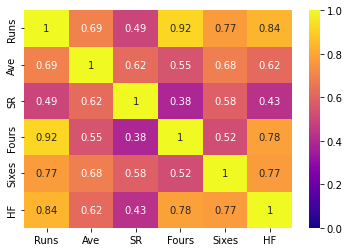

In [9]:
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap='plasma', vmin = 0, vmax = 1);

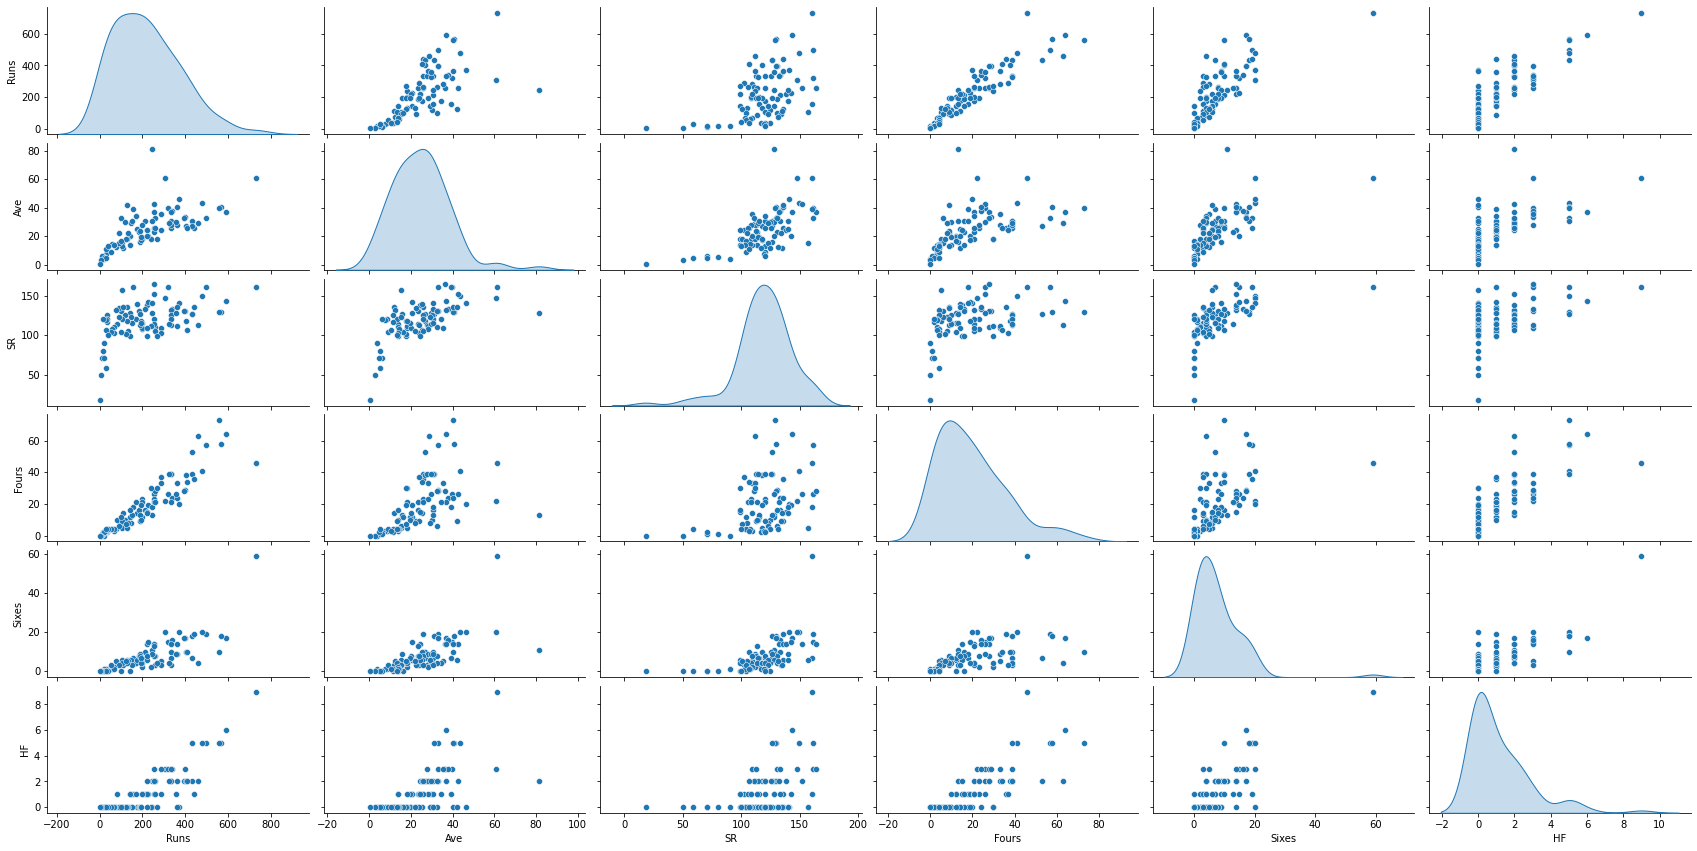

In [10]:
sns.pairplot(df1, height=2, aspect=2, diag_kind='kde');

In [11]:
#Removing outliers using IQR
for values in df1.columns:
    
    q1 = np.percentile( df1[values], 25, interpolation = 'midpoint')
    q3 = np.percentile( df1[values], 75, interpolation = 'midpoint')
    
    iqr= q3-q1
    
    df1.drop(df1[(df1[values]>=(q3+1.5*iqr))|(df1[values]<=(q3-1.5*iqr))].index)

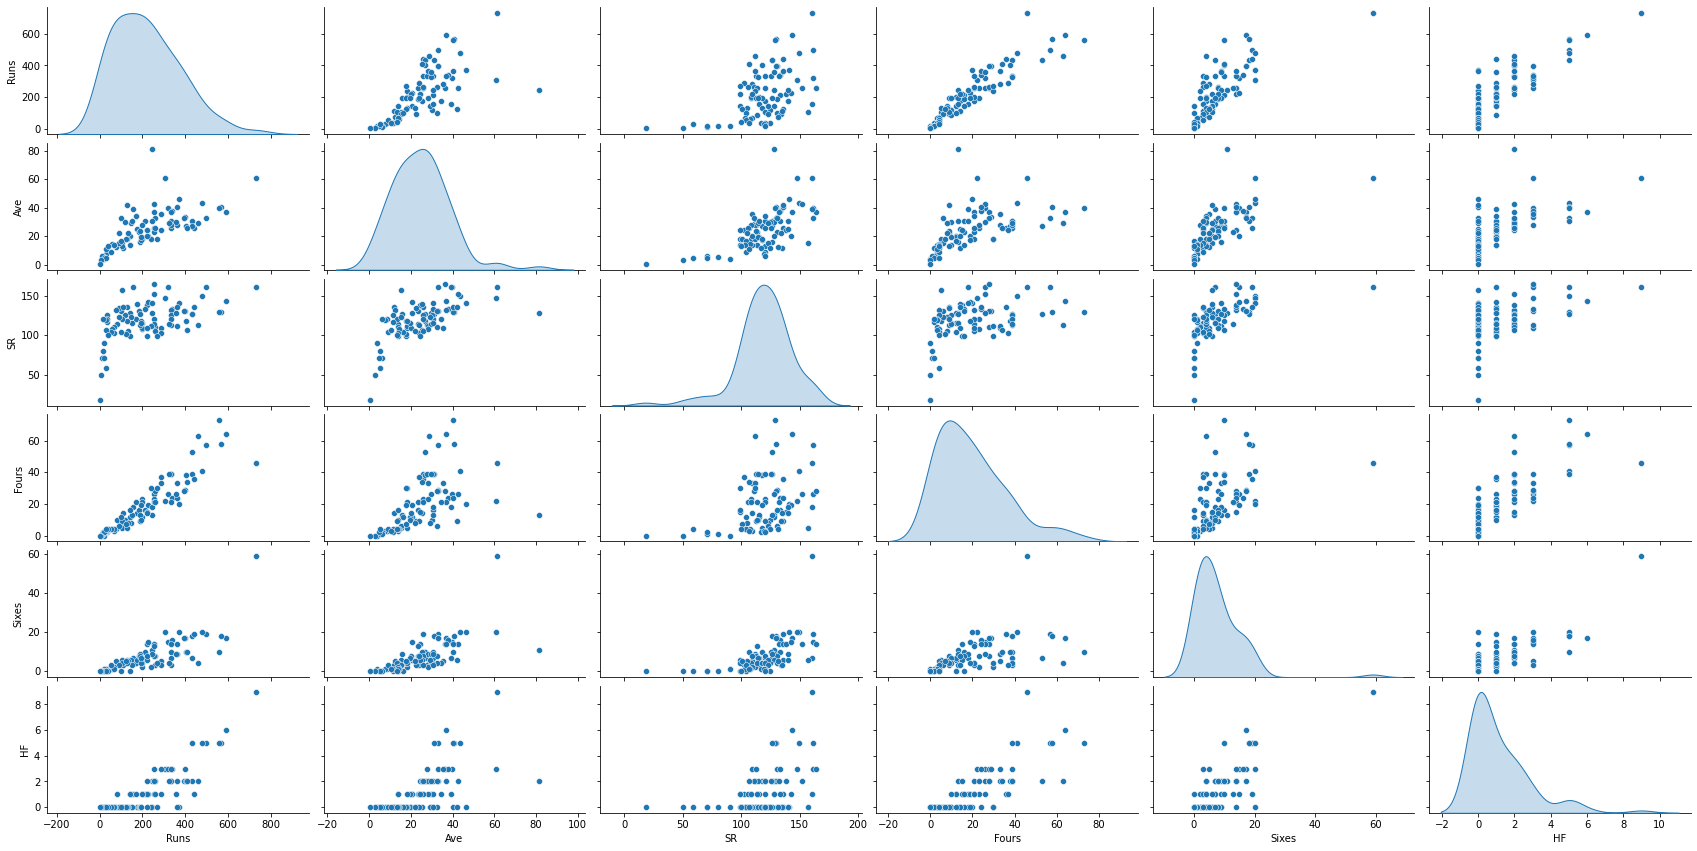

In [12]:
sns.pairplot(df1, height=2, aspect=2, diag_kind='kde');

Looks like the outliers are not making much of an influence in the data. So I'll keep them in the data

In [13]:
df1.shape

(90, 6)

In [18]:
df['Run_rank'] = df1['Runs'].rank();
df['Ave_rank'] = df1['Ave'].rank();
df['SR_rank'] = df1['SR'].rank();
df['Fours_rank'] = df1['Fours'].rank();
df['Six_rank'] = df1['Sixes'].rank();
df['HF_rank'] = df1['HF'].rank();

/var/folders/zg/qg4lqmvj08gc7k0b5837czbh0000gn/T/ipykernel_10908/3028557174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Run_rank'] = df1['Runs'].rank();
/var/folders/zg/qg4lqmvj08gc7k0b5837czbh0000gn/T/ipykernel_10908/3028557174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ave_rank'] = df1['Ave'].rank();
/var/folders/zg/qg4lqmvj08gc7k0b5837czbh0000gn/T/ipykernel_10908/3028557174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [15]:
df

,Name,Runs,Ave,SR,Fours,Sixes,HF,Run_rank,Ave_rank,SR_rank,Fours_rank,Six_rank,HF_rank
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,90.0,89.0,87.0,84.0,90.0,90.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,89.0,76.0,81.0,89.0,81.0,89.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,86.0,70.5,89.0,86.0,85.5,86.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,85.0,86.0,83.0,83.0,88.0,86.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,88.0,83.0,62.0,87.0,83.5,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,3.0,7.5,5.0,4.5,6.0,23.0
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,6.5,4.0,4.0,7.0,6.0,23.0
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,8.0,5.0,3.0,16.0,6.0,23.0
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,2.0,2.0,2.0,2.0,6.0,23.0


In [22]:
cols = ['Run_rank', 'Ave_rank', 'SR_rank', 'Fours_rank', 'Six_rank', 'HF_rank']
tups = df[cols].sort_values(cols, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)

df.assign(Rank=factorized)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Run_rank,Ave_rank,SR_rank,Fours_rank,Six_rank,HF_rank,Rank
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,90.0,89.0,87.0,84.0,90.0,90.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,89.0,76.0,81.0,89.0,81.0,89.0,2
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,86.0,70.5,89.0,86.0,85.5,86.0,5
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,85.0,86.0,83.0,83.0,88.0,86.0,6
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,88.0,83.0,62.0,87.0,83.5,86.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,3.0,7.5,5.0,4.5,6.0,23.0,88
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,6.5,4.0,4.0,7.0,6.0,23.0,84
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,8.0,5.0,3.0,16.0,6.0,23.0,83
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,2.0,2.0,2.0,2.0,6.0,23.0,89


In [25]:
df.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Run_rank,Ave_rank,SR_rank,Fours_rank,Six_rank,HF_rank
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,90.0,89.0,87.0,84.0,90.0,90.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,89.0,76.0,81.0,89.0,81.0,89.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,86.0,70.5,89.0,86.0,85.5,86.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,85.0,86.0,83.0,83.0,88.0,86.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,88.0,83.0,62.0,87.0,83.5,86.0
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,87.0,81.0,61.0,90.0,67.0,86.0
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,65.0,88.0,82.0,58.0,88.0,80.0
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,82.0,67.0,57.0,80.0,83.5,86.0
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,66.0,80.0,88.0,64.0,77.5,80.0
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,54.0,90.0,60.0,38.0,70.0,69.0


The above 10 players are the top performers based on the data driven ranking model.

End